# Softmax Classifier

This exercise guides you through the process of classifying images using a Softmax classifier. As part of this you will:

- Implement a fully vectorized loss function for the Softmax classifier
- Calculate the analytical gradient using vectorized code
- Tune hyperparameters on a validation set
- Optimize the loss function with Stochastic Gradient Descent (SGD)
- Visualize the learned weights

In [1]:
# start-up code! 
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from load_cifar10_tvt import load_cifar10_train_val
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_train_val()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)    
print('Val data shape: ', X_val.shape)
print('Val labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train, validation and testing sets have been created as 
 X_i and y_i where i=train,val,test
Train data shape:  (3073, 49000)
Train labels shape:  (49000,)
Val data shape:  (3073, 1000)
Val labels shape:  (1000,)
Test data shape:  (3073, 1000)
Test labels shape:  (1000,)


Code for this section is to be written in `f17cs7643/classifiers/softmax.py`

In [38]:
# Now, implement the vectorized version in softmax_loss_vectorized.

import time
from f17cs7643.classifiers.softmax import softmax_loss_vectorized

W = np.random.randn(10, 3073) * 0.0001

tic = time.time()
loss_vectorized, grad = softmax_loss_vectorized(W, X_train, y_train, 0.00001)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss_vectorized)
print('sanity check: %f' % (-np.log(0.1)))

# gradient check. 
from f17cs7643.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_vectorized(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

vectorized loss: 2.351528e+00 computed in 0.221114s
loss: 2.351528
sanity check: 2.302585
numerical: -0.600630 analytic: 1.308335, relative error: 1.000000e+00
numerical: 0.307824 analytic: -1.188296, relative error: 1.000000e+00
numerical: 0.469057 analytic: 1.671800, relative error: 5.618047e-01
numerical: -0.650323 analytic: 0.307925, relative error: 1.000000e+00
numerical: 0.147701 analytic: -2.637652, relative error: 1.000000e+00
numerical: 0.547403 analytic: -0.649746, relative error: 1.000000e+00
numerical: 0.128785 analytic: -1.199544, relative error: 1.000000e+00
numerical: 0.956787 analytic: -0.015669, relative error: 1.000000e+00
numerical: 0.359766 analytic: 0.446940, relative error: 1.080617e-01
numerical: 1.336744 analytic: 3.338175, relative error: 4.281210e-01


float64


  5%|█████▌                                                                                                          | 1/20 [00:02<00:55,  2.93s/it]

loss: 5.831529148139158
iteration 0 / 20: loss 5.831529


 10%|███████████▏                                                                                                    | 2/20 [00:05<00:48,  2.71s/it]

loss: 9.04262270068518


 15%|████████████████▊                                                                                               | 3/20 [00:08<00:45,  2.67s/it]

loss: 13.417482938239615


 20%|██████████████████████▍                                                                                         | 4/20 [00:10<00:43,  2.72s/it]

loss: 15.472002554024069


 25%|████████████████████████████                                                                                    | 5/20 [00:13<00:41,  2.74s/it]

loss: 17.79377035830096


 30%|█████████████████████████████████▌                                                                              | 6/20 [00:16<00:38,  2.77s/it]

loss: 19.86572029381871


 35%|███████████████████████████████████████▏                                                                        | 7/20 [00:19<00:35,  2.73s/it]

loss: 20.482908715729227


 40%|████████████████████████████████████████████▊                                                                   | 8/20 [00:21<00:32,  2.72s/it]

loss: 24.00362435472913


 45%|██████████████████████████████████████████████████▍                                                             | 9/20 [00:24<00:30,  2.73s/it]

loss: 22.704153964630486


 50%|███████████████████████████████████████████████████████▌                                                       | 10/20 [00:27<00:27,  2.73s/it]

loss: 25.080550187817973


 55%|█████████████████████████████████████████████████████████████                                                  | 11/20 [00:30<00:24,  2.73s/it]

loss: 27.848435373944152


 60%|██████████████████████████████████████████████████████████████████▌                                            | 12/20 [00:33<00:22,  2.80s/it]

loss: 30.3880101579573


 65%|████████████████████████████████████████████████████████████████████████▏                                      | 13/20 [00:35<00:19,  2.77s/it]

loss: 31.73747186781442


 70%|█████████████████████████████████████████████████████████████████████████████▋                                 | 14/20 [00:38<00:16,  2.74s/it]

loss: 29.698791461677953


 75%|███████████████████████████████████████████████████████████████████████████████████▎                           | 15/20 [00:41<00:13,  2.73s/it]

loss: 34.766827999862585


 80%|████████████████████████████████████████████████████████████████████████████████████████▊                      | 16/20 [00:43<00:11,  2.75s/it]

loss: 31.66628638600415


 85%|██████████████████████████████████████████████████████████████████████████████████████████████▎                | 17/20 [00:46<00:08,  2.77s/it]

loss: 36.47178334085222


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████▉           | 18/20 [00:49<00:05,  2.74s/it]

loss: 37.68398042536377


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 19/20 [00:52<00:02,  2.73s/it]

loss: 36.30261569353136


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:54<00:00,  2.75s/it]

loss: 34.850016000682615


Text(0, 0.5, 'Loss value')

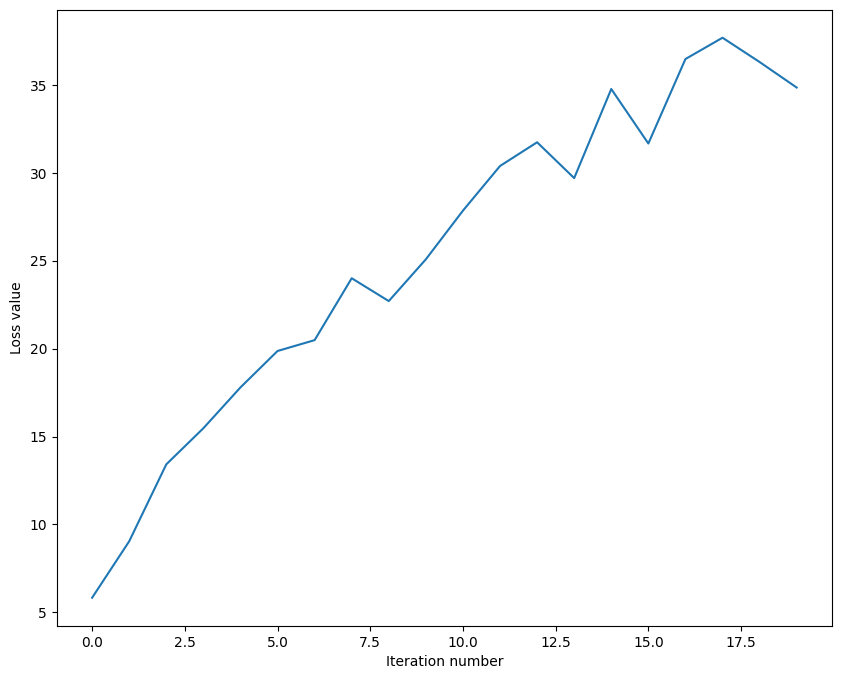

In [42]:
# Now that efficient implementations to calculate loss function and gradient of the softmax are ready,
# use it to train the classifier on the cifar-10 data
from f17cs7643.classifiers import Softmax
classifier = Softmax()
loss_hist = classifier.train(X_train, y_train, learning_rate=1e-3, reg=1e-5, num_iters= 20,batch_size=300, verbose=True)
# Plot loss vs. iterations
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [43]:
# Evaluate on test set
y_test_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.096000


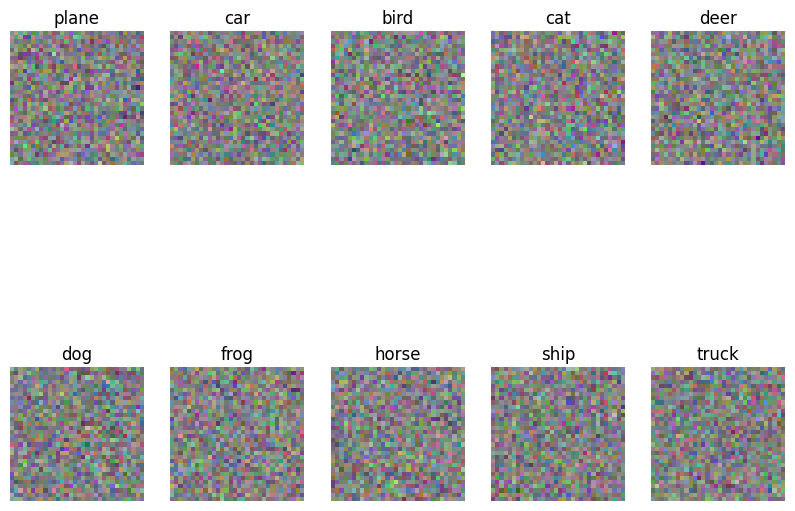

In [44]:
# Visualize the learned weights for each class
w = classifier.W[:,:-1] # strip out the bias
w = w.reshape(10, 32, 32, 3)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])